In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/colab_notebooks/Data/main_dataset.csv')

In [4]:
train_data['Id'] = np.where(train_data['Id'] < 1e-18, 1e-18, train_data['Id'])
train_data['Log_Id'] = np.log10(train_data['Id'])

In [5]:

X = train_data[[ 'Tox', 'Nc','Nd', 'Ns', 'Vds', 'Vgs']] # ignoring Tsi
y = train_data['Log_Id']


poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=10, n_estimators=500, n_jobs = -1, random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=10,
                      n_estimators=500, n_jobs=-1, random_state=42)

In [19]:
# the above code eas execulted on google collab with TPU processor, since it is taking more than 1 hour to train the model in laptop

# importing the trained model
import joblib
# model = joblib.load("randomForest_model.joblib")
model.score(X_train, y_train)

0.9994929028390697

In [20]:
y_pred_1 = model.predict(X_test)
print(r2_score(y_pred_1, y_test))


0.9991862921959526


In [21]:
# note :
# 1. Ignored - column - Tsi
# the train inputs are preprocesses with polynomail features (degree = 3, include_bias = False)
# train inputs are further processed StanderScaler
# while testing the test data - first preprocess the data by removing the values less than 1e-18
# preprocess - data with poly(which was fitted on to the train) and scaler (which wass fitted on train)

# model predicts the log(Id) value

In [22]:
# testing the model on the test data set
#  importing the testt data
test_data = pd.read_csv('/content/drive/MyDrive/colab_notebooks/Data/test_data.csv')


In [23]:
print(test_data[test_data['Vgs'] == 2].index.tolist())

[202, 405, 608, 811, 1014]


In [24]:
test_data = test_data.iloc[0:203]
print(test_data)

     Tsi  Tox            Ns            Nc            Nd  Vds       Vgs  \
0     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.000000   
1     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.002000   
2     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.005733   
3     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.012951   
4     10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  0.022951   
..   ...  ...           ...           ...           ...  ...       ...   
198   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.962951   
199   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.972951   
200   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.982951   
201   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  1.992951   
202   10  2.5  1.000000e+20  1.000000e+17  5.000000e+18  0.5  2.000000   

               Id  
0    2.330000e-18  
1    4.340000e-18  
2    1.130000e-18  
3    5.430000e-19  
4    4.5200

In [25]:
test_data['Id'] = np.where(test_data['Id'] < 1e-18, 1e-18, test_data['Id'])
test_data['Log_Id'] = np.log10(test_data['Id'])

In [26]:
X_test_1 = test_data[[ 'Tox','Nc','Nd', 'Ns', 'Vds', 'Vgs']]
y_test_1 = test_data['Log_Id']

In [27]:
X_test_1_transformed = poly.transform(X_test_1)
X_test_1_scaled = scaler.transform(X_test_1_transformed)

y_pred_test_1 = model.predict(X_test_1_scaled)
print(r2_score(y_pred_test_1, y_test_1))
print(mean_absolute_error(y_pred_test_1, y_test_1))
print(root_mean_squared_error(y_pred_test_1, y_test_1))

0.9946180812742441
0.10997663907914623
0.31970764121684236


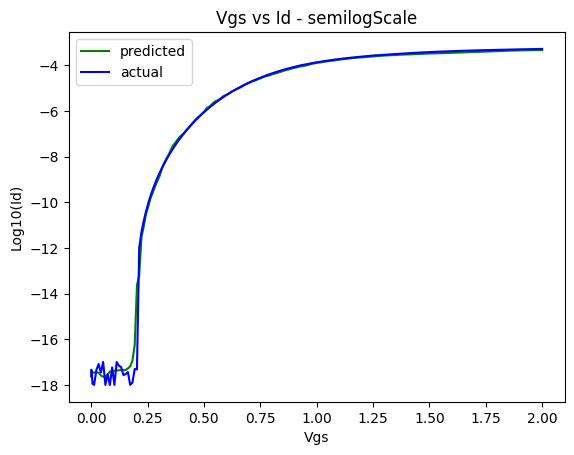

In [28]:
# plotting the data
plt.plot(X_test_1['Vgs'], y_pred_test_1, color = "green", label="predicted")
plt.plot(X_test_1['Vgs'], y_test_1, color = "blue", label="actual")
plt.title('Vgs vs Id - semilogScale')
plt.xlabel('Vgs')
plt.ylabel('Log10(Id)')
plt.legend()
plt.show()

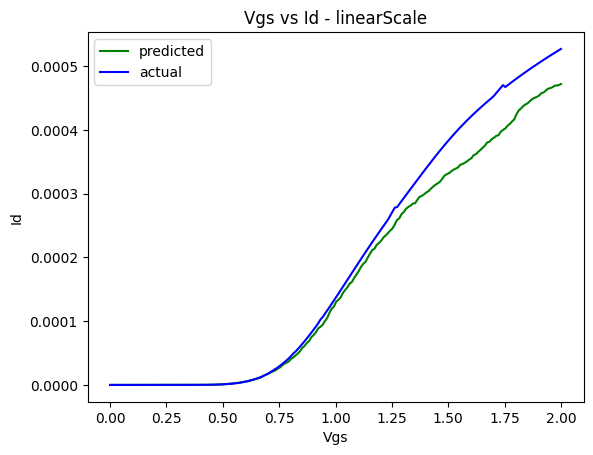

In [29]:
# plotting the data
from cProfile import label

plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_pred_test_1), 1e-18), color = "green", label="predicted")
plt.plot(X_test_1['Vgs'], np.maximum(np.power(10, y_test_1), 1e-18), color = "blue", label="actual")
plt.title('Vgs vs Id - linearScale')
plt.xlabel('Vgs')
plt.ylabel('Id')
plt.legend()
plt.show()